In [81]:
! pip install -q chart_studio
! pip install -q bqplot
! pip install -q pingouin
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sms
import chart_studio.plotly     as py
import os
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



# Introducción

### Objetivos
1. Predecir el cumplimiento de las obligaciones crediticias de los clientes
2. Incrementar en un 10% el indice de cumplimiento de creditos

### Contexto comercial
Poder conocer el riesgo crediticio implicaría diversos beneficios para las empresas financieras entre ellas encontramos: te permite conocer si es factible realizar prestamos a las personas que lo solicitan, otorgar tarjetas de crédito al sujeto de acuerdo al cumplimiento y monto de los créditos pedidos. Al usar un proceso de automatización se podría generar algún algoritmo que sirva en primera instancia para determinar rápidamente si es viable otorgar créditos, sin embargo habrá que evaluar algunas situaciones especificas en donde se crea que el crédito otorgado pueda ser devuelto por el individuo, evitando de esta manera generalizaciones que engloben todos los casos.
### Problema
¿Qué factores son determinantes para poder determinar el riesgo crediticio? 
### Contexto analitico
La entidad financiera proporciono informacion personal y datos presentados por los solicitantes de tarjetas de creditos como tambien la forma de cumplimiento de las deudas crediticias de varios de sus clientes con la finalidad de predecir la probabilidad de futuros incumplimientos de las deudas
### Hipótesis
El factor más determinante para poder determinar el riesgo crediticio es el nivel de ingresos de las personas porque mayores ingresos implicaría mayor posibilidad de devolución de deuda o cumplir con los plazos de la tarjeta de crédito. Por otra parte, otros elementos importantes serian la propiedad de un auto, una propiedad, tipo de vivienda, numero de hijos y tamaño de la familia. Tanto la categoría de ingresos, ocupación como el nivel educativo estaría asociada al nivel de ingreso. Las variables que no tendrían un impacto importante serian si tienen un celular, si tienen un teléfono del trabajo, si tienen teléfono y si tienen correo electrónico porque en la actualidad la gran mayoría de personas tienen dichos artículos. Y los valores que seria necesario realizar un análisis para saber si son determinantes serian el sexo, estado civil, años y antigüedad.


# Cargar el data set de los datos personales de los clientes

In [82]:
df=pd.read_csv(r'C:\Users\Usuario\OneDrive\Escritorio\CODERHOUSE\DATA SCIENSE\application_record.csv')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


Las variables que se representan en las columnas para este data set son:

*ID: Número de cliente

*CODE_GENDER: Sexo

*FLAG_OWN_CAR: ¿Hay un coche?

*FLAG_OWN_REALTY:¿Hay una propiedad?

*CNT_CHILDREN: Número de hijos

*AMT_INCOME_TOTAL: Ingreso anual

*NAME_INCOME_TYPE: Categoría de ingresos

*NAME_EDUCATION_TYPE: Nivel educativo

*NAME_FAMILY_STATUS: Estado civil

*NAME_HOUSING_TYPE: Modo de vida

*DAYS_BIRTH:  Cumpleaños Contar hacia atrás desde el día actual (0), -1 significa ayer

*DAYS_EMPLOYED: Fecha de inicio del empleo Contar hacia atrás desde el día actual (0). Si es positivo, significa la persona actualmente desempleada.

*FLAG_MOBIL: ¿Hay un teléfono móvil?

*FLAG_WORK_PHONE: ¿Hay un teléfono del trabajo?

*FLAG_PHONE: ¿Hay un teléfono?

*FLAG_EMAIL: ¿Hay un correo electrónico?

*OCCUPATION_TYPE: Ocupación

*CNT_FAM_MEMBERS: Tamaño de la familia

In [83]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


# Cambios en la base de datos

## Calcular edad

In [84]:
df['Edad']=abs(df['DAYS_BIRTH']/365).astype(int)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Edad
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52


### Calcular antigüedad

Los valores positivos de la columna DAYS_EMPLOYED significan el periodo de dias que la persona esta desempleada para el analisis de la variable antigüedad no es relevante saber cuantos años la persona esta desempleada por lo que se transformara en un valor nulo

In [85]:
df.loc[df['DAYS_EMPLOYED'] >0, 'DAYS_EMPLOYED'] = 0
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Edad
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,0,1,0,0,0,NaN,1.0,62
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,43
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,22
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,0,1,0,0,0,NaN,2.0,59


In [86]:
df['Antigüedad']=abs(df['DAYS_EMPLOYED']/365).astype(int)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Edad,Antigüedad
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,0,1,0,0,0,NaN,1.0,62,0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,43,8
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,22,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,0,1,0,0,0,NaN,2.0,59,0


In [87]:
df.drop(['DAYS_EMPLOYED', 'DAYS_BIRTH'], axis=1)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Edad,Antigüedad
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,32,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,32,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,58,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,1,0,0,0,NaN,1.0,62,0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,1.0,43,8
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,1,1,0,0,Sales staff,1.0,22,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2.0,59,0


# Cargar el data set de la situacion crediticia

In [88]:
dfcr1=pd.read_csv(r'C:\Users\Usuario\OneDrive\Escritorio\CODERHOUSE\DATA SCIENSE\credit_record.csv')
dfcr1.head()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


### STATUS Status (explicacion): 
- #0: 1-29 días vencidos 
- #1: 30-59 días vencidos 
- #2: 60-89 días vencidos 
- #3: 90-119 días vencidos 
- #4: 120-149 días vencidos 
- #5: Deudas vencidas o incobrables, cancelaciones de más de 150 días 
- #C: pagado ese mes 
- #X: ningún préstamo para el mes

In [89]:
dfcr1.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [90]:
#Mientras menor es el puntaje financiero mejor es su situacion
dfcr1['Puntaje financiero'] = ['0' if x in ['X', 'C']
                             else '1' if x=='0'
                             else '2' if x=='1'
                             else '3' if x=='2'
                             else '4' if x=='3' 
                             else '5' if x=='4'
                             else '6'
                            for x in dfcr1['STATUS']]
dfcr1

,ID,MONTHS_BALANCE,STATUS,Puntaje financiero
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,1
3,5001711,-3,0,1
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


Se Convertio la columna "puntaje financiero" en variables numericas porque no lograba resultados coherente, dando como resultado promedio que superaban el valor "6", cuando el valor maximo que podia tomar la variable "puntaje financiero" es "6"


In [91]:
dfcr1['Puntaje financiero'] = dfcr1['Puntaje financiero'].astype(float)

In [92]:
dfcr2=dfcr1.groupby('ID')['Puntaje financiero'].mean()
dfcr2

ID
5001711    0.750000
5001712    0.526316
5001713    0.000000
5001714    0.000000
5001715    0.000000
             ...   
5150482    0.666667
5150483    0.000000
5150484    0.923077
5150485    1.000000
5150487    0.000000
Name: Puntaje financiero, Length: 45985, dtype: float64

In [93]:
dfcr2.describe()

count    45985.000000
mean         0.496721
std          0.398225
min          0.000000
25%          0.157895
50%          0.444444
75%          0.857143
max          5.736842
Name: Puntaje financiero, dtype: float64

## Eliminamos valores incorrectos
porque los valores tienen que estar entre 0 y 6 que son los puntaje financieros creados

In [94]:
dfcr3 = dfcr2[(dfcr2 >= 0) & (dfcr2 <= 6)]
dfcr3
#

ID
5001711    0.750000
5001712    0.526316
5001713    0.000000
5001714    0.000000
5001715    0.000000
             ...   
5150482    0.666667
5150483    0.000000
5150484    0.923077
5150485    1.000000
5150487    0.000000
Name: Puntaje financiero, Length: 45985, dtype: float64

# Unimos ambas bases de datos

In [95]:
df2 = pd.merge(df,dfcr3,on='ID')
df2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Edad,Antigüedad,Puntaje financiero
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,32,12,0.187500
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,32,12,0.200000
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,58,3,0.233333
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,52,8,0.400000
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,52,8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,47,6,1.916667
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,33,3,3.000000
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,33,3,2.181818
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,49,1,1.300000


In [96]:
df2.drop(['DAYS_EMPLOYED', 'DAYS_BIRTH'], axis=1)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Edad,Antigüedad,Puntaje financiero
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,32,12,0.187500
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,32,12,0.200000
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,58,3,0.233333
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8,0.400000
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Managers,2.0,47,6,1.916667
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,2.0,33,3,3.000000
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,2.0,33,3,2.181818
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2.0,49,1,1.300000


In [97]:
df2.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Edad,Antigüedad,Puntaje financiero
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,-2200.317168,1.0,0.225526,0.294813,0.089722,2.198453,43.260334,5.614560,0.511561
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,2366.796762,0.0,0.417934,0.455965,0.285787,0.911686,11.510414,6.417027,0.401791
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,34.000000,1.000000,0.173913
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,42.000000,4.000000,0.466667
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,53.000000,8.000000,0.857143
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,0.000000,1.0,1.000000,1.000000,1.000000,20.000000,68.000000,43.000000,5.736842


In [98]:
df2['Puntaje financiero'].value_counts(ascending=False)

1.000000    4675
0.000000    4455
0.500000    1251
0.666667     766
0.750000     719
            ... 
1.642857       1
1.705882       1
2.054054       1
2.524590       1
1.916667       1
Name: Puntaje financiero, Length: 1305, dtype: int64

# Data Wrangling

### Valores nulos

In [99]:
df2.isna().sum().sort_values(ascending=False)

OCCUPATION_TYPE        11323
ID                         0
DAYS_EMPLOYED              0
Antigüedad                 0
Edad                       0
CNT_FAM_MEMBERS            0
FLAG_EMAIL                 0
FLAG_PHONE                 0
FLAG_WORK_PHONE            0
FLAG_MOBIL                 0
DAYS_BIRTH                 0
CODE_GENDER                0
NAME_HOUSING_TYPE          0
NAME_FAMILY_STATUS         0
NAME_EDUCATION_TYPE        0
NAME_INCOME_TYPE           0
AMT_INCOME_TOTAL           0
CNT_CHILDREN               0
FLAG_OWN_REALTY            0
FLAG_OWN_CAR               0
Puntaje financiero         0
dtype: int64

Se puede observar que la unica columna que tiene valores nulos es la ocupacion esto puede ser debido a gran variedad de factores: puede ser que la persona en cuestion en la actualidad se encuentre desempleado, que no declaro haber tenido una ocupacion específica o que sea una persona que no trabaje en relacion de dependencia

In [100]:
df2.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
Edad                     int32
Antigüedad               int32
Puntaje financiero     float64
dtype: object

# Analisis exploratorio de datos (EDA)

##  Clasificacion de variables

### Variables categoricas

In [101]:
categ_columns=[]
for col in df2.columns:
    if df2[col].nunique()<9 or col=='OCCUPATION_TYPE':
        categ_columns.append(col)
print('Las columnas categoricas son{}'.format(categ_columns))

Las columnas categoricas son['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']


### Variables numericas


In [102]:
num_columns=[]
for col in df2.columns:
    if df2[col].nunique() > 9 and col != 'ID' and col !='OCCUPATION_TYPE' and col !='DAYS_EMPLOYED' and col !='DAYS_BIRTH':
        num_columns.append(col)
print('Las columnas numericas son{}'.format(num_columns))

Las columnas numericas son['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'Edad', 'Antigüedad', 'Puntaje financiero']


## Analisis univariado

### Variables categoricas

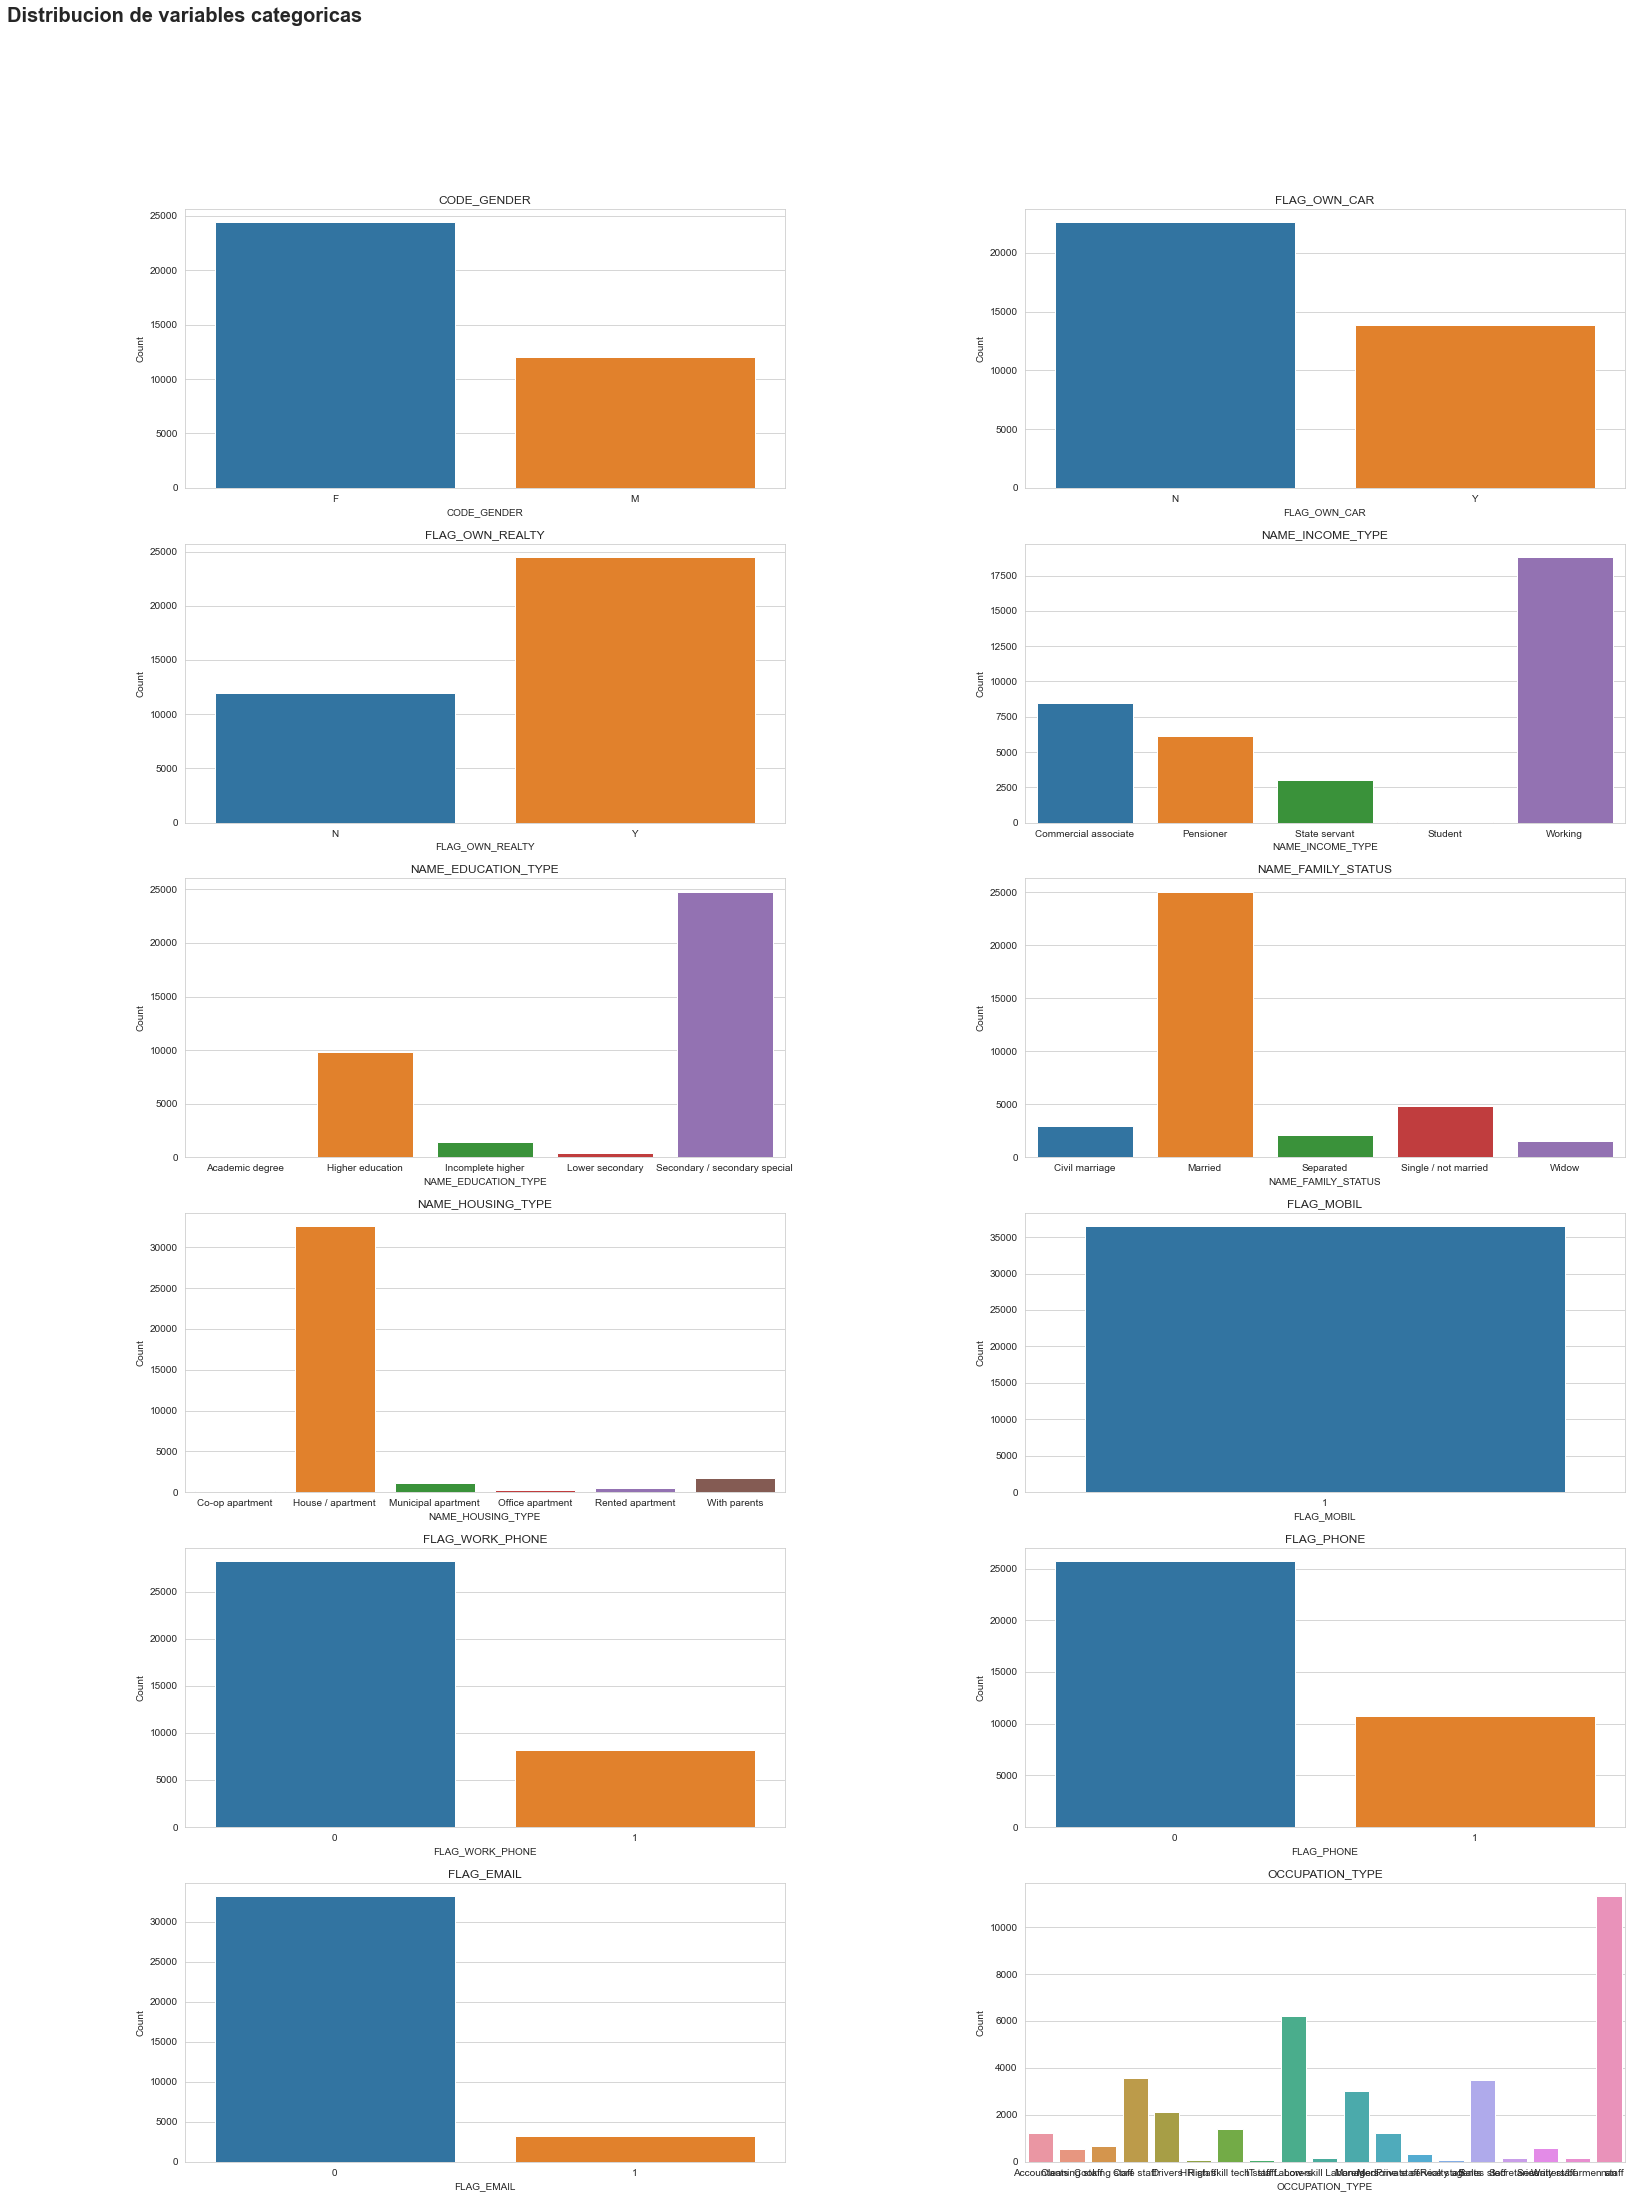

In [103]:

fig=plt.figure(figsize=[50,35])
fig.suptitle('Distribucion de variables categoricas', fontsize=20,fontweight='bold')
fig.subplots_adjust(top=0.9);
fig.subplots_adjust(0.5, wspace=0.4);
for x, columns in enumerate(categ_columns):
    input = np.unique(df2[columns].astype(str) , return_counts = True)
    col= 'input'
    ax1=fig.add_subplot(6,2,x+1);
    ax1=sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Count')

Como se puede apreciar en los graficos de las variables categoricas tienen una distribucion muy desigual en cada una de las variables a analizar 

## Variables numericas

<Figure size 3600x2160 with 0 Axes>

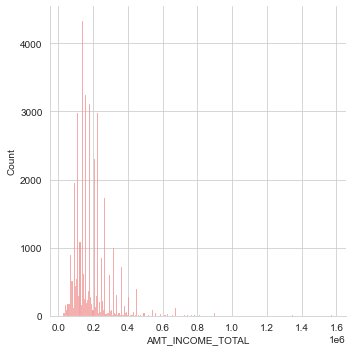

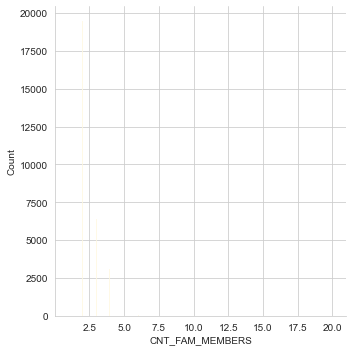

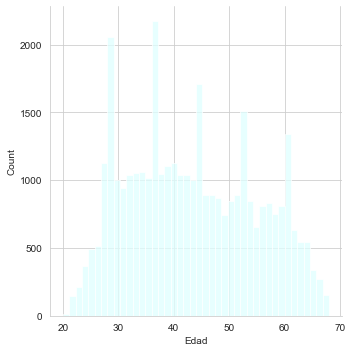

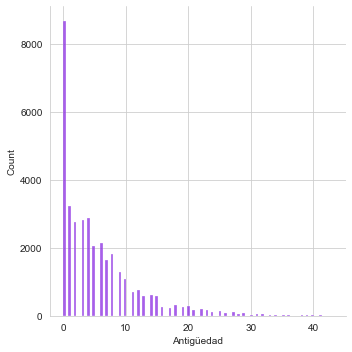

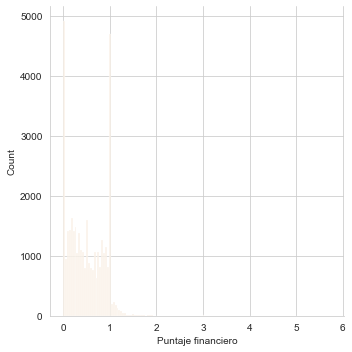

In [104]:
colors_num=['lightcoral','cornsilk','lightcyan','blueviolet','linen','lightgreen','slategray','lightpink','lightseagreen','gold','plum','yellowgreen']

fig.suptitle('Distribuciones de variables numericas',fontsize=20,fontweight='bold')
fig= plt.figure(figsize=[50,30])
fig.subplots_adjust(hspace=0.5,wspace=0.4);
for x, col in enumerate(num_columns):
    ax=sns.displot(df2[col], color=colors_num[x])


Existe una tendencia definida en la gran mayoria de variables numericas

# Tenencia de autos vs Puntaje financiero
Se observa que a simple vista no existe diferencia significativa entre hombres y mujeres y personas que tienen o no auto

Text(0, 0.5, 'Puntaje financiero')

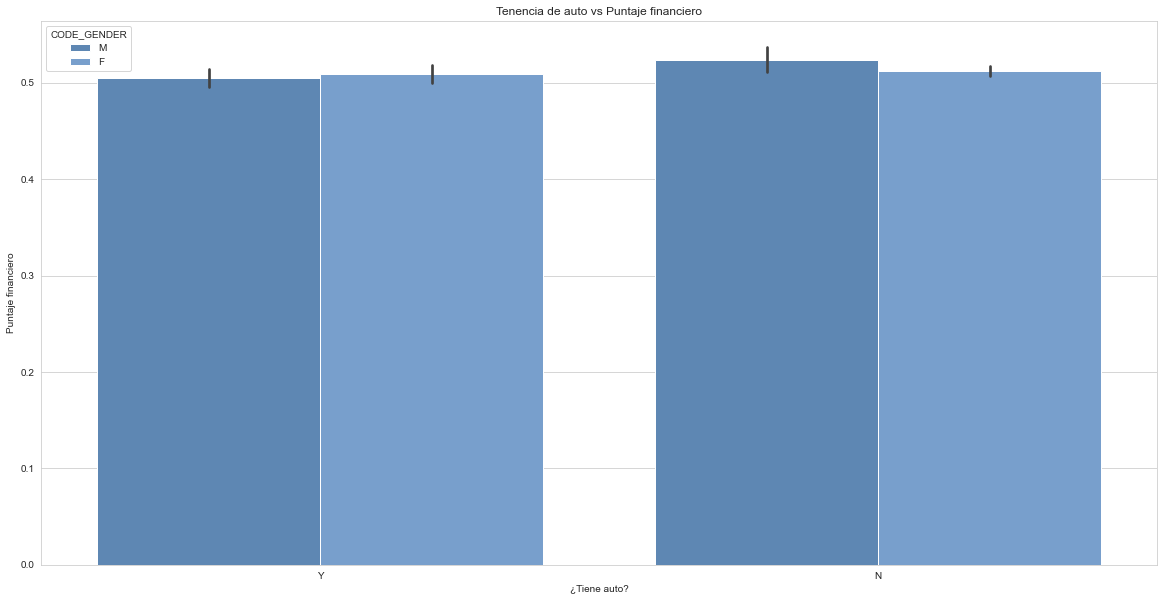

In [105]:
plt.figure(figsize=(20,10))
my_colors = ["#5086c1", "#6a9eda", "#84b6f4", "#b2dafa", "#dcffff"]
sns.barplot(data=df2, x="FLAG_OWN_CAR",y="Puntaje financiero", hue="CODE_GENDER", palette=my_colors)
sns.set_style("whitegrid")
plt.title("Tenencia de auto vs Puntaje financiero")
plt.xlabel("¿Tiene auto?")
plt.ylabel("Puntaje financiero")

# Tenencia de propiedad vs Puntaje financiero
Se observa que la tenencia de una propiedad no afecta al puntaje financiero

Text(0, 0.5, 'Puntaje financiero')

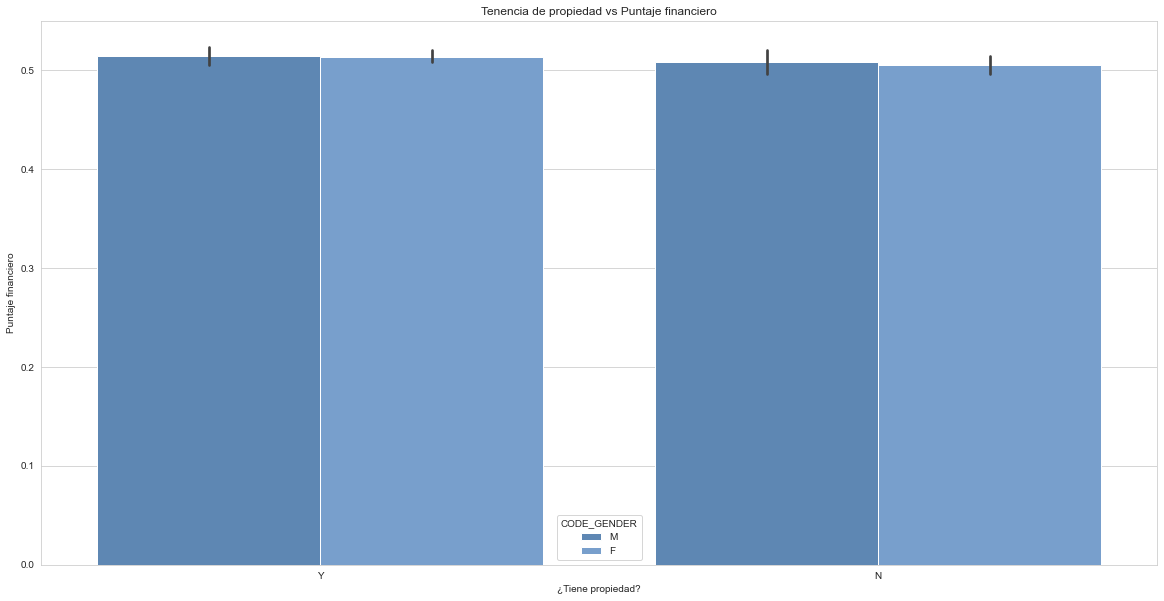

In [106]:
plt.figure(figsize=(20,10))
sns.barplot(data=df2, x="FLAG_OWN_REALTY",y="Puntaje financiero", hue="CODE_GENDER", palette=my_colors)
sns.set_style("whitegrid")
plt.title("Tenencia de propiedad vs Puntaje financiero")
plt.xlabel("¿Tiene propiedad?")
plt.ylabel("Puntaje financiero")

# Ingresos vs Puntaje financiero
Analizando el grafico vemos que a simple vista un mayor ingreso conlleva un menor puntaje financiero y por ende un mayor cumplimiento de los creditos y mientras menor el ingreso ocurre lo contrario. Sin embargo la gran mayoria de la muestra se encuentra con ingresos bajos por lo que la muestra no es muy equilibrada

Text(0, 0.5, 'Puntaje financiero')

<Figure size 1440x720 with 0 Axes>

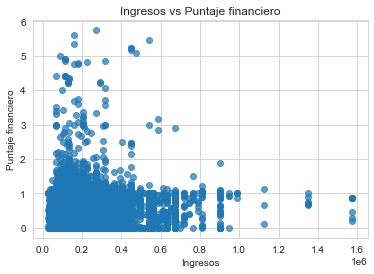

In [107]:
plt.figure(figsize=(20,10))
fig, ax =plt.subplots()
ax.scatter(df2['AMT_INCOME_TOTAL'],df2['Puntaje financiero'],alpha=0.7)
ax.set_title('Ingresos vs Puntaje financiero')
ax.set_xlabel('Ingresos')
ax.set_ylabel('Puntaje financiero')

# Tipo de ingreso vs puntaje financiero
En el grafico demuestra que el tipo de ingreso no es una variable significativa al momento de determinar un puntaje financiero a excepcion de los estudiantes que tienen el menor puntaje, esto puede ser debido porque hay pocos datos de esta categoria

Text(0, 0.5, 'Puntaje financiero')

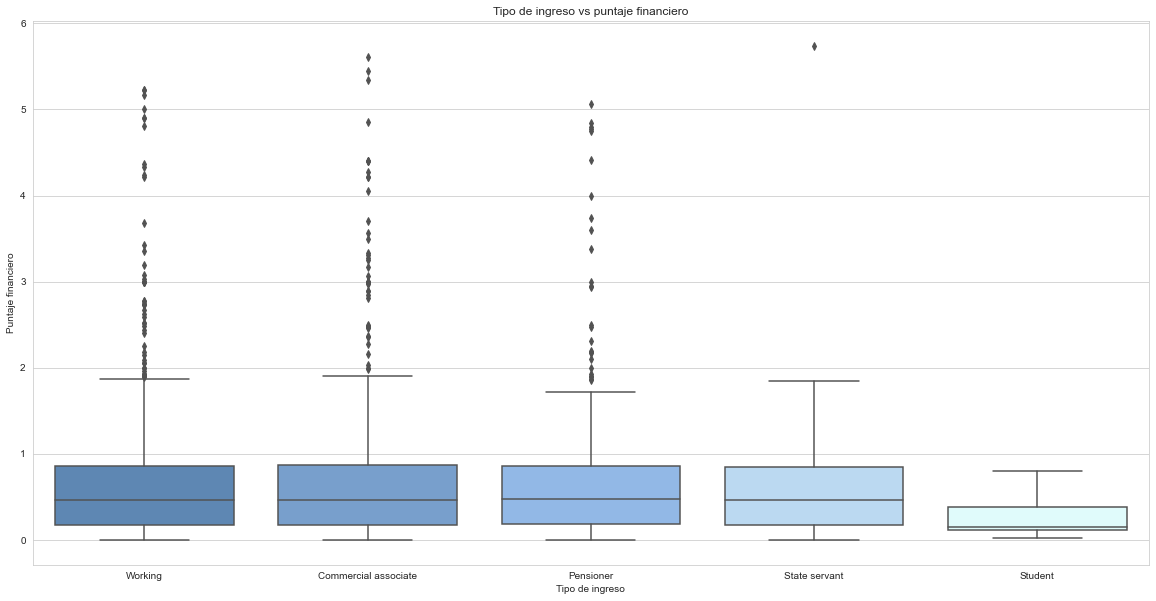

In [108]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="NAME_INCOME_TYPE", y="Puntaje financiero", data=df2,palette=my_colors)
sns.set_style("whitegrid")
plt.title("Tipo de ingreso vs puntaje financiero")
plt.xlabel("Tipo de ingreso")
plt.ylabel("Puntaje financiero")


# Nivel educacion vs Puntaje financiero
En el siguiente grafico observamos ocurre una situacion similar al tipo de ingreso en donde todas las clases son similares los puntajes financieros con excepcion de los que dejaron la academia y un poco mas bajo los que estan cursando al principio de la secundaria

Text(0, 0.5, 'Puntaje financiero')

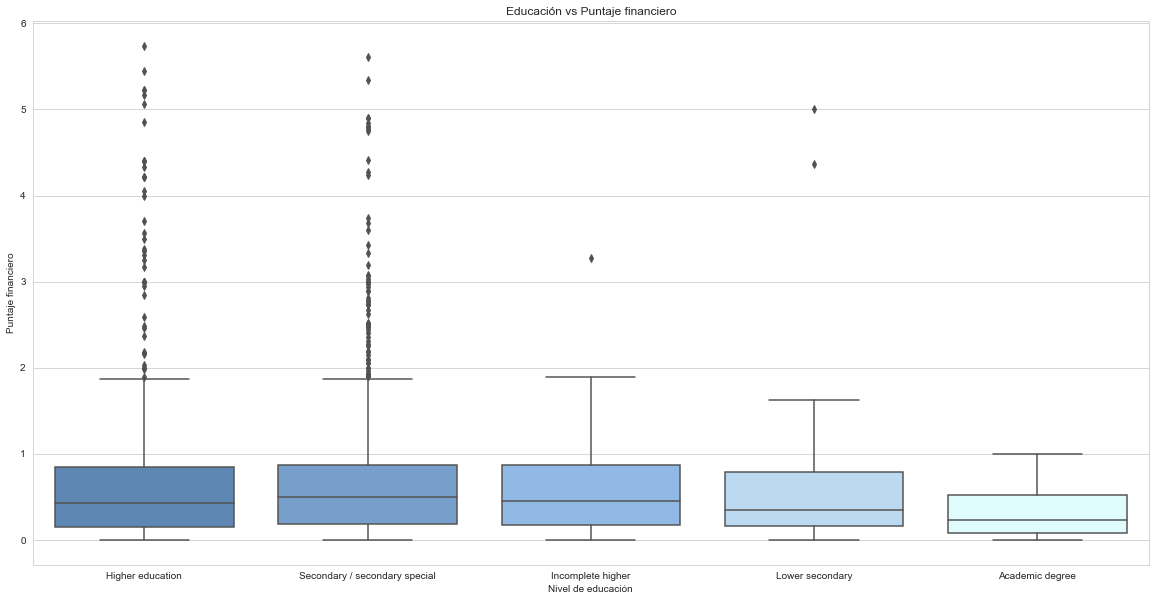

In [109]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="NAME_EDUCATION_TYPE", y="Puntaje financiero", data=df2,palette=my_colors)
sns.set_style("whitegrid")
plt.title("Educación vs Puntaje financiero")
plt.xlabel("Nivel de educación")
plt.ylabel("Puntaje financiero")

# Familia vs Puntaje financiero
No se percibe que la familia afecte de manera directa la responsabilidad crediticia

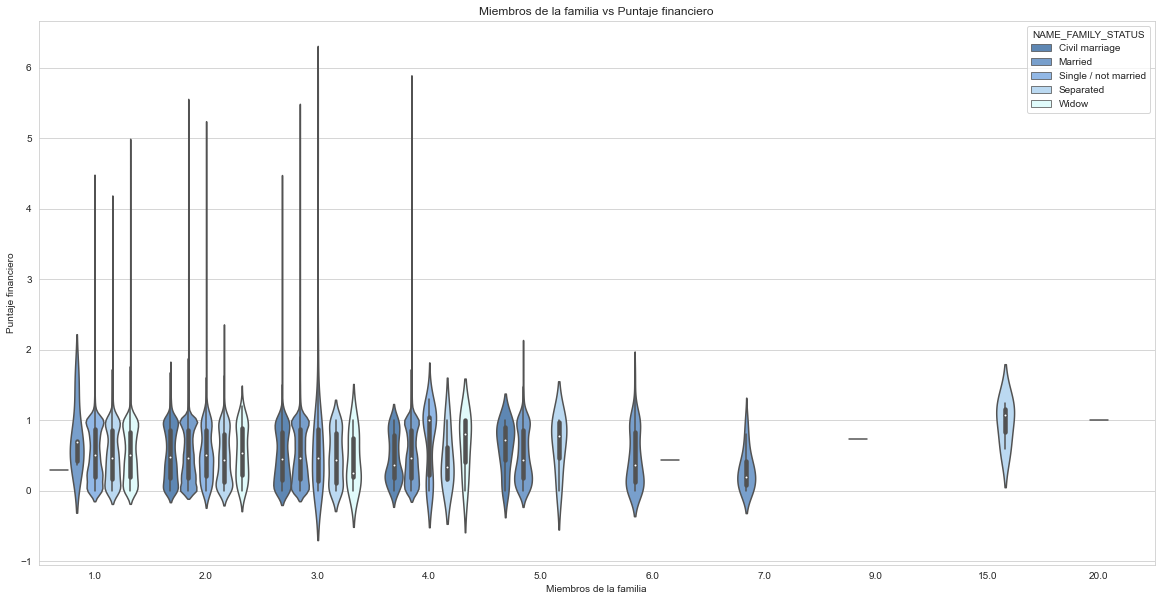

In [110]:
plt.figure(figsize=(20,10))
sns.violinplot(x="CNT_FAM_MEMBERS", y="Puntaje financiero",hue='NAME_FAMILY_STATUS',data=df2,palette=my_colors)
sns.set_style("whitegrid")
plt.title("Miembros de la familia vs Puntaje financiero")
plt.xlabel("Miembros de la familia")
plt.ylabel("Puntaje financiero")
plt.show()


# Tipo de vivienda vs Puntaje financiero
Se evidencia que el tipo de vivienda es un factor determinante del riesgo financiero sin embargo se observa que los que viven en casas y edficios son la gran mayoria de las personas por lo que puede afectar significativamente a la relacion. Teniendo en cuenta la mediana del resto de los casos pareciera que a menor precio pagan (como seria el caso de que comparten departamento) mejor es su puntaje financiero, esto puede ser debido a que disponen de mayor dinero para poder hacer frente a los creditos solicitaron.


Text(0, 0.5, 'Puntaje financiero')

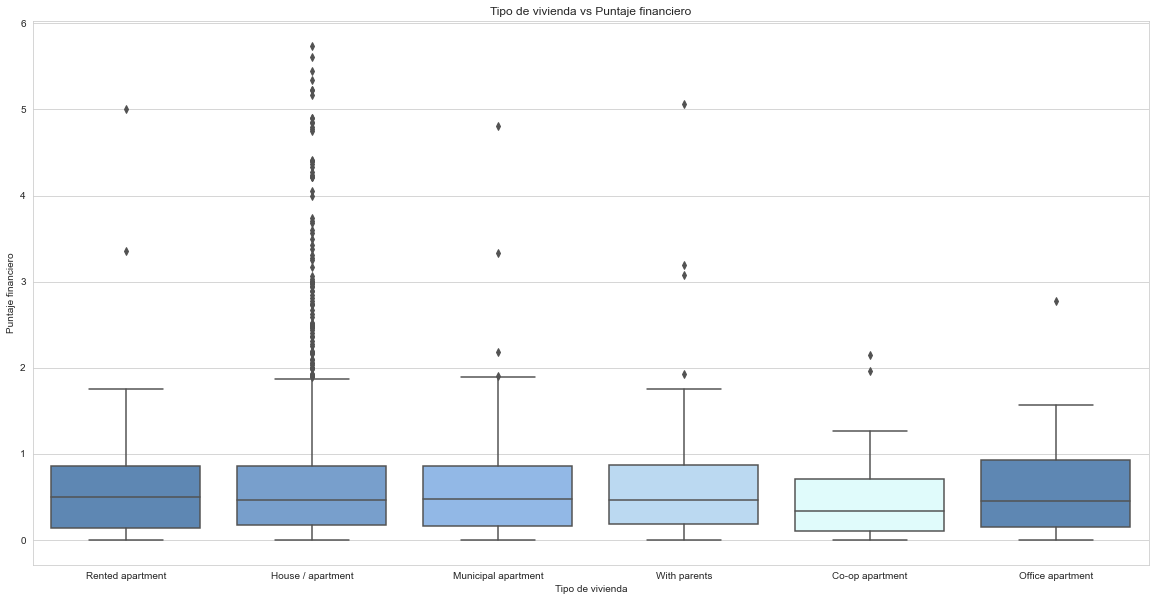

In [111]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="NAME_HOUSING_TYPE", y="Puntaje financiero", data=df2,palette=my_colors)
sns.set_style("whitegrid")
plt.title("Tipo de vivienda vs Puntaje financiero")
plt.xlabel("Tipo de vivienda")
plt.ylabel("Puntaje financiero")

# Edad vs Puntaje financiero
A simple vista no se visualiza que la edad tenga influencia en el cumplimiento de los pagos

Text(0, 0.5, 'Puntaje financiero')

<Figure size 1440x720 with 0 Axes>

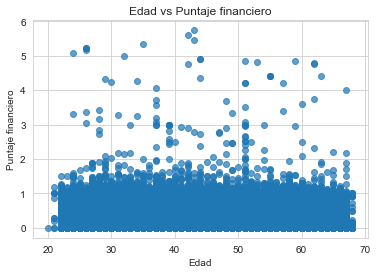

In [112]:
plt.figure(figsize=(20,10))
fig, ax =plt.subplots()
ax.scatter(df2['Edad'],df2['Puntaje financiero'],alpha=0.7)
ax.set_title('Edad vs Puntaje financiero')
ax.set_xlabel('Edad')
ax.set_ylabel('Puntaje financiero')

# Ocupacion vs Puntaje financiero
se puede observar que la ocupacion juega un papel importante a la hora de cumplir con los pagos. Depende el trabajo los hombre son mas propensos a tener mayor puntaje financiero como es el caso de los que trabajan en HR staff y por otro lado las mujeres tienen un puntaje financiero mayor como los que requerien pocas habilidades o las que trabajan en IT. Tambien ocurren casos que son muu nivelados ambos puntajes como vendadeores, empleados de seguridad, etc

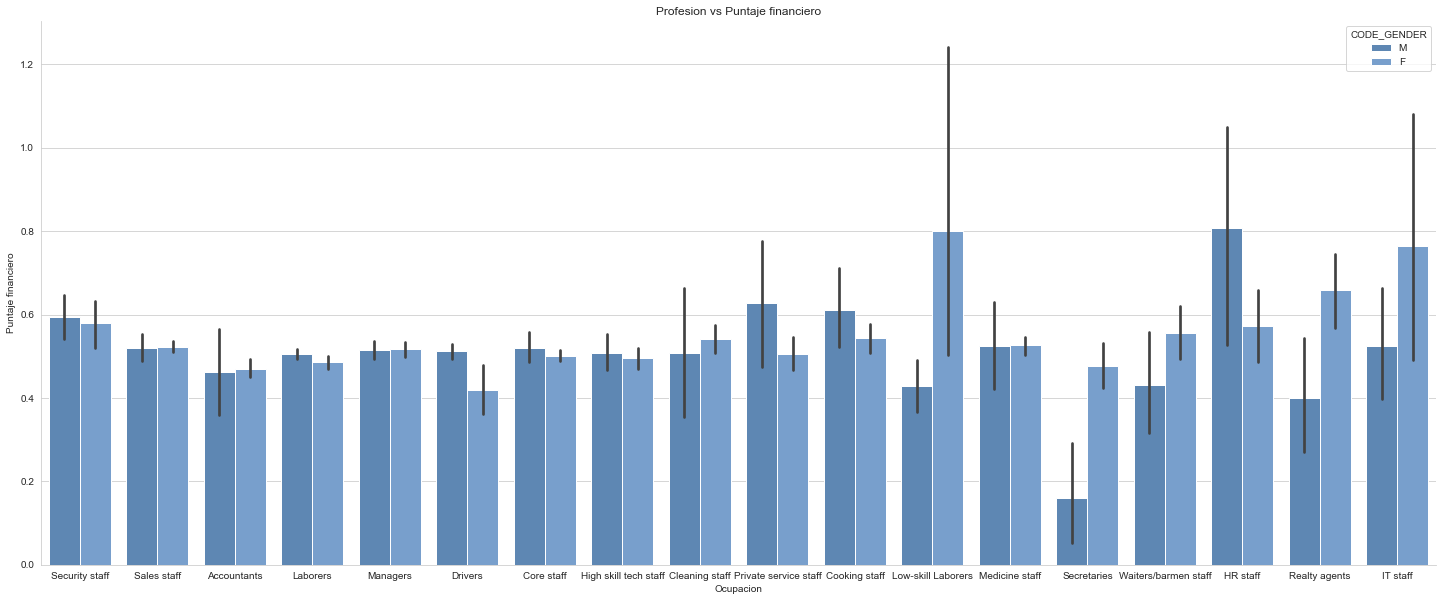

In [113]:
plt.figure(figsize=(25,10))
sns.barplot(x='OCCUPATION_TYPE',y='Puntaje financiero', hue='CODE_GENDER',data=df2,palette=my_colors)
plt.title("Profesion vs Puntaje financiero")
plt.xlabel("Ocupacion")
plt.ylabel("Puntaje financiero")
sns.despine()
sns.set_style("whitegrid")
plt.show()

## Definir variables

In [114]:
x=df2.drop(categ_columns+['Puntaje financiero']+['DAYS_BIRTH']+['DAYS_EMPLOYED'],axis=1)
y=df2['Puntaje financiero']

In [115]:
x

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,Edad,Antigüedad
0,5008804,0,427500.0,2.0,32,12
1,5008805,0,427500.0,2.0,32,12
2,5008806,0,112500.0,2.0,58,3
3,5008808,0,270000.0,1.0,52,8
4,5008809,0,270000.0,1.0,52,8
...,...,...,...,...,...,...
36452,5149828,0,315000.0,2.0,47,6
36453,5149834,0,157500.0,2.0,33,3
36454,5149838,0,157500.0,2.0,33,3
36455,5150049,0,283500.0,2.0,49,1


In [116]:
y

0        0.187500
1        0.200000
2        0.233333
3        0.400000
4        0.000000
           ...   
36452    1.916667
36453    3.000000
36454    2.181818
36455    1.300000
36456    1.214286
Name: Puntaje financiero, Length: 36457, dtype: float64

In [117]:
c=df2[['ID','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE']]
c

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE
0,5008804,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN
1,5008805,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN
2,5008806,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff
3,5008808,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff
4,5008809,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Managers
36453,5149834,F,N,Y,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,Medicine staff
36454,5149838,F,N,Y,Pensioner,Higher education,Married,House / apartment,1,0,1,1,Medicine staff
36455,5150049,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff


# Forward selection

In [118]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [119]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [120]:
sfs.fit(x2,y)
sfs.k_feature_names_ 

ValueError: could not convert string to float: 'M'

# Regresion

In [ ]:
df3['Puntaje_financiero']= df3['Puntaje financiero']

In [ ]:
modelo='Puntaje_financiero~CNT_CHILDREN+CNT_FAM_MEMBERS+Antigüedad+CODE_GENDER+FLAG_OWN_CAR+FLAG_OWN_REALTY+NAME_INCOME_TYPE+NAME_EDUCATION_TYPE+NAME_FAMILY_STATUS+NAME_HOUSING_TYPE+OCCUPATION_TYPE'
lm = sms.ols(formula=modelo, data=df3).fit()
print(lm.summary())

In [ ]:
# A primera vista no parece significativo el modelo porque tiene un valor  R-squared muy bajo, voy a eliminar variables para aumentar el R-squared
modelo='Puntaje_financiero~CODE_GENDER+NAME_INCOME_TYPE+NAME_HOUSING_TYPE+OCCUPATION_TYPE'
lm = sms.ols(formula=modelo, data=df3).fit()
print(lm.summary())

### A pesar que se han eliminado variables que tenian un bajo valor de p no mejora el R_squared por lo que esta herramienta de regresion no es un buen método para poder crear un modelo para esta base de datos

# Clasificacion

In [ ]:
df2

In [121]:
#vamos a crear una columna para saber si aceptamos darle el credito o no a la persona
df2['otorgar_credito']=df2['Puntaje financiero'].apply(lambda x:'0' if x<1 else'1')
df2
#si el valor de la columna otorgar_credito es igual a 0 significa que si es conveniente otorgar el credito

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Edad,Antigüedad,Puntaje financiero,otorgar_credito
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32,12,0.187500,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32,12,0.200000,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,58,3,0.233333,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52,8,0.400000,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52,8,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Managers,2.0,47,6,1.916667,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,1,0,1,1,Medicine staff,2.0,33,3,3.000000,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,1,0,1,1,Medicine staff,2.0,33,3,2.181818,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Sales staff,2.0,49,1,1.300000,1


In [122]:
x

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,Edad,Antigüedad
0,5008804,0,427500.0,2.0,32,12
1,5008805,0,427500.0,2.0,32,12
2,5008806,0,112500.0,2.0,58,3
3,5008808,0,270000.0,1.0,52,8
4,5008809,0,270000.0,1.0,52,8
...,...,...,...,...,...,...
36452,5149828,0,315000.0,2.0,47,6
36453,5149834,0,157500.0,2.0,33,3
36454,5149838,0,157500.0,2.0,33,3
36455,5150049,0,283500.0,2.0,49,1


In [123]:
x2= df2['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'Antigüedad', 'outlier_iqr']

KeyError: ('CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'Antigüedad', 'outlier_iqr')

In [124]:
y2=df2['otorgar_credito']
y2

0        0
1        0
2        0
3        0
4        0
        ..
36452    1
36453    1
36454    1
36455    1
36456    1
Name: otorgar_credito, Length: 36457, dtype: object

In [125]:
x2=df2[['ID','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE','CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'Antigüedad']]
x2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_CHILDREN,CNT_FAM_MEMBERS,Antigüedad
0,5008804,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,0,2.0,12
1,5008805,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,0,2.0,12
2,5008806,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,0,2.0,3
3,5008808,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,0,1.0,8
4,5008809,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Managers,0,2.0,6
36453,5149834,F,N,Y,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,0,2.0,3
36454,5149838,F,N,Y,Pensioner,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,0,2.0,3
36455,5150049,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,0,2.0,1


## Arbol de decision

In [126]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
clf = DecisionTreeClassifier(random_state=1234,criterion='gini',max_depth=6)
model = clf.fit(x_train, y_train)

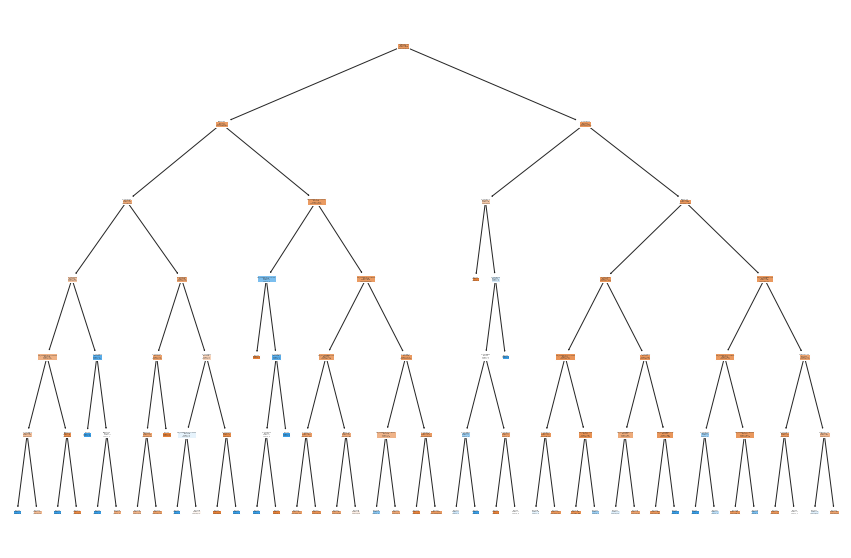

In [127]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf,feature_names=x_train.columns,filled=True)
plt.savefig("decision_tree_new.png", bbox_inches='tight')

## Metricas del modelo de clasificacion

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=0.2,random_state=1)
modelo=RandomForestClassifier(random_state=1)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(x_train,y_train)
pred=modelo.predict(x_test)

In [129]:
pred

array(['0', '0', '1', ..., '0', '0', '0'], dtype=object)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

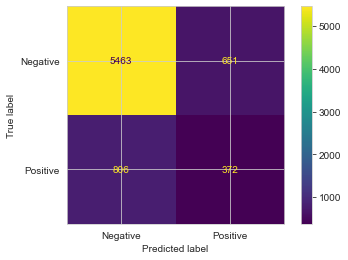

In [130]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, x_test, y_test, display_labels=['Negative', 'Positive'])

In [131]:
accuracy = metrics.accuracy_score(y_test, pred)
accuracy 

0.8001919912232583

In [132]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6114
           1       0.36      0.32      0.34      1178

    accuracy                           0.80      7292
   macro avg       0.62      0.60      0.61      7292
weighted avg       0.79      0.80      0.79      7292



Como se puede observar es factible utilizar el método de clasificacion porque tiene una precision significativa y usar el arbol de decision ayuda a simplificar el modelo. Por un lado se observa que la gran mayoria de los creditos otorgados fueron devueltos en tiempo y forma siendo la posibilidad de equivocarse relativamente baja, sin embargo si tenemos en cuenta las personas que no devolvieron el credito a tiempo a pesar de ser muy pocas hay un alto margen de error por lo cual habria que reducir ese margen con posteriores analisis.

# Eliminar outlier

In [ ]:
q1=x.quantile(0.25)
q3=x.quantile(0.75)
x2=x.copy()
iqr=q3-q1
limite_superior=q3+1.5*iqr
limite_inferior=q1-1.5*iqr
x2['outlier_iqr'] = x2.apply(lambda row: 1 if any(np.abs(row) > limite_superior) or any(np.abs(row) < limite_inferior) else 0, axis=1)
x2

In [ ]:
x2.describe()

In [ ]:
x2['outlier_iqr'].value_counts()

In [ ]:
x3 = x2[x2['outlier_iqr'] != 1]
x3

In [ ]:
df3=pd.merge(c,x3,on='ID')
df3

In [ ]:
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 16}

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Distirbuciones de variables', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate():
    ax = fig.add_subplot(5, 3, i+1)
    ax = sns.boxplot(df3[col],  color=colors_num[i]) 
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}  skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=10) 